### SVM Dementia Prediction
* Dementia is a syndrome – usually of a chronic or progressive nature – in which there is deterioration in cognitive function (i.e. the ability to process thought) beyond what might be expected from normal aging. It affects memory, thinking, orientation, comprehension, calculation, learning capacity, language, and judgment. Consciousness is not affected. The impairment in cognitive function is commonly accompanied and occasionally preceded, by deterioration in emotional control, social behaviou, or motivation.

* Dementia results from a variety of diseases and injuries that primarily or secondarily affect the brain, such as Alzheimer's disease or stroke.

* Dementia is one of the major causes of disability and dependency among older people worldwide. It can be overwhelming, not only for the people who have it, but also for their carers and families. There is often a lack of awareness and understanding of dementia, resulting in stigmatization and barriers to diagnosis and care. The impact of dementia on carers, family, and society at large can be physical, psychological, social and e and economic

In [1]:
import numpy as np
import pandas as pd

### Loading the Dataset 

In [12]:
df = pd.read_csv('dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [13]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


#### Removing the unwanted Features 

* we can understand from going through this dataset the 'MRI ID' and 'Subject ID' is not affecting the target so we can remove that from out domain knowledge 

In [14]:
df.drop(['MRI ID','Subject ID'],axis=1, inplace=True)

In [15]:
df.sample(3)

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
252,Nondemented,1,0,F,R,73,11,4.0,30.0,0.0,1475,0.726,1.190
19,Nondemented,1,0,F,R,78,16,2.0,29.0,0.0,1333,0.748,1.316
35,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234


### using the dummy varible

* we can see that the 'M/F' that is male or female column so it is important to detect the dementia ,but that is str format and two classes in single feature we can change that using with the 'pd.get_dummies' method and convert these classes into 0 or 1 class and save as different features.

In [16]:
dummy = pd.get_dummies(df['M/F'])

In [17]:
df = pd.concat([df,dummy],axis=1)

In [18]:
df.drop(['M/F'],axis=1,inplace=True)

In [19]:
df.sample(3)

,Group,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,F,M
113,Nondemented,2,842,R,84,16,3.0,28.0,0.0,1500,0.744,1.170,1,0
275,Demented,1,0,R,70,11,4.0,29.0,0.5,1295,0.748,1.355,1,0
236,Demented,2,504,R,75,13,2.0,28.0,0.5,1520,0.708,1.155,1,0


In [20]:
df.isnull().sum()

Group        0
Visit        0
MR Delay     0
Hand         0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
F            0
M            0
dtype: int64

### fill the missing values

In [21]:
df['SES'].fillna(df['SES'].median(),inplace=True)
df['MMSE'].fillna(df['MMSE'].median(),inplace=True)

In [22]:
df.isnull().sum()

Group       0
Visit       0
MR Delay    0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
F           0
M           0
dtype: int64

In [23]:
df.dtypes

Group        object
Visit         int64
MR Delay      int64
Hand         object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
F             uint8
M             uint8
dtype: object

### Here we can see that here 'Group' and 'Hand' is object and all others are int and float. So we need to change that to further process

In [24]:
dummy = pd.get_dummies(df['Hand'])
df = pd.concat([df,dummy],axis=1)
df.sample(3)

,Group,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,F,M,R
59,Converted,3,1588,R,91,12,3.0,28.0,0.5,1463,0.696,1.199,1,0,1
171,Demented,1,0,R,69,12,4.0,23.0,0.5,1447,0.759,1.213,1,0,1
144,Nondemented,4,2163,R,73,12,4.0,28.0,0.0,1444,0.722,1.215,0,1,1


In [25]:
df.drop(['Hand'],axis=1,inplace=True)
df.sample(2)

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,F,M,R
144,Nondemented,4,2163,73,12,4.0,28.0,0.0,1444,0.722,1.215,0,1,1
90,Demented,3,866,71,14,4.0,22.0,1.0,1332,0.679,1.317,0,1,1


In [26]:
df.dtypes

Group        object
Visit         int64
MR Delay      int64
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
F             uint8
M             uint8
R             uint8
dtype: object

#### we see the target value


In [27]:
df['Group'].sample(5)

363    Nondemented
241    Nondemented
127       Demented
275       Demented
47     Nondemented
Name: Group, dtype: object

In [28]:
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

###  Using LableEncoder

* here there are three classes in the Target varible and also those classes are in str dtype, so we need to change this classes dtype

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()

In [34]:
df['targetGroup'] = encoder.fit_transform(df['Group'])
df.sample(4)

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,F,M,R,targetGroup
217,Demented,3,1387,86,15,3.0,30.0,0.5,1498,0.681,1.171,0,1,1,1
324,Nondemented,1,0,77,16,1.0,29.0,0.0,1818,0.734,0.965,0,1,1,2
13,Nondemented,1,0,93,14,2.0,30.0,0.0,1272,0.698,1.380,1,0,1,2
354,Demented,1,0,79,20,1.0,26.0,0.5,1548,0.711,1.134,0,1,1,1


In [35]:
df['targetGroup'].value_counts()

2    190
1    146
0     37
Name: targetGroup, dtype: int64

* converted - 0
* Demented - 1
* Nondemented - 2


In [36]:
df.drop(['Group'],axis=1,inplace=True)

In [37]:
df.sample(2)

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,F,M,R,targetGroup
264,4,2153,84,18,1.0,29.0,0.5,1668,0.694,1.052,0,1,1,0
283,1,0,67,16,1.0,29.0,0.5,1337,0.766,1.312,1,0,1,1


### Cheking the outliers

In [40]:
import matplotlib.pyplot as plt

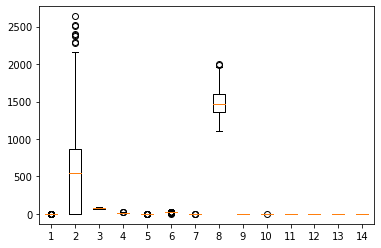

In [41]:
plt.boxplot(df)
plt.show()

* removing the outliers if there is anything 

### IQR(inter qurtilerange) method or 5 number summary

* here we are finding a lowerbracket(lb) and higherbracket(hb) and only selecting the datapoints which are in between these lb and hb . For that fist we need to find the IQR and all the steps for that i mentioned in below

In [38]:
# finding the outlaires
q1 = df.quantile(.25)
q3 = df.quantile(.75)

In [39]:
iqr = q3 - q1
iqr

Visit            1.000
MR Delay       873.000
Age             11.000
EDUC             4.000
SES              1.000
MMSE             3.000
CDR              0.500
eTIV           240.000
nWBV             0.056
ASF              0.194
F                1.000
M                1.000
R                0.000
targetGroup      1.000
dtype: float64

In [42]:
df.shape

(373, 14)

In [43]:
# lower bracket
lb = q1 - 1.5 * iqr
lb

Visit            -0.500
MR Delay      -1309.500
Age              54.500
EDUC              6.000
SES               0.500
MMSE             22.500
CDR              -0.750
eTIV            997.000
nWBV              0.616
ASF               0.808
F                -1.500
M                -1.500
R                 1.000
targetGroup      -0.500
dtype: float64

In [44]:
hb = q3 + 1.5 * iqr
hb

Visit             3.500
MR Delay       2182.500
Age              98.500
EDUC             22.000
SES               4.500
MMSE             34.500
CDR               1.250
eTIV           1957.000
nWBV              0.840
ASF               1.584
F                 2.500
M                 2.500
R                 1.000
targetGroup       3.500
dtype: float64

In [45]:
cleanDf = df[(df >= lb) & (df<=hb)]
cleanDf

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,F,M,R,targetGroup
0,1.0,0.0,87,14.0,2.0,27.0,0.0,NaN,0.696,0.883,0,1,1,2
1,2.0,457.0,88,14.0,2.0,30.0,0.0,NaN,0.681,0.876,0,1,1,2
2,1.0,0.0,75,12.0,2.0,23.0,0.5,1678.0,0.736,1.046,0,1,1,1
3,2.0,560.0,76,12.0,2.0,28.0,0.5,1738.0,0.713,1.010,0,1,1,1
4,3.0,1895.0,80,12.0,2.0,NaN,0.5,1698.0,0.701,1.034,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2.0,842.0,82,16.0,1.0,28.0,0.5,1693.0,0.694,1.037,0,1,1,1
369,3.0,NaN,86,16.0,1.0,26.0,0.5,1688.0,0.675,1.040,0,1,1,1
370,1.0,0.0,61,13.0,2.0,30.0,0.0,1319.0,0.801,1.331,1,0,1,2
371,2.0,763.0,63,13.0,2.0,30.0,0.0,1327.0,0.796,1.323,1,0,1,2


In [46]:
cleanDf.shape

(373, 14)

 * converting X and y


In [50]:
X = df.drop(['targetGroup'],axis=1)
X.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,F,M,R
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,1,1
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,1,1
2,1,0,75,12,2.0,23.0,0.5,1678,0.736,1.046,0,1,1
3,2,560,76,12,2.0,28.0,0.5,1738,0.713,1.010,0,1,1
4,3,1895,80,12,2.0,22.0,0.5,1698,0.701,1.034,0,1,1


In [ ]:
new_observation = [75, 1458, 4, 0, 0.88, 0.8, 400, 4.5, 0]


In [51]:
y = df.targetGroup

In [52]:
corr = X.corrwith(y)
correlation = corr.sort_values(ascending=True)
correlation

CDR        -0.572518
M          -0.143918
Age        -0.049267
ASF        -0.042848
Visit       0.048434
MR Delay    0.049262
eTIV        0.056693
SES         0.066154
EDUC        0.100606
F           0.143918
nWBV        0.258093
MMSE        0.338224
R                NaN
dtype: float64

### To reduce the diamentianality we can use PCA (priciple componenets analysis)

* Standardize the Data: Since PCA is sensitive to the scale of the features, it's important to standardize the data before applying PCA

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [63]:
# standardize the data
scaler = StandardScaler()

In [64]:
X_std = scaler.fit_transform(X)

* Fit PCA: Once you have standardized the data, you can fit PCA using the PCA class from the sklearn.decomposition module. You can specify the number of components you want to retain using the n_components parameter. For example, if you set n_components to 2, PCA will create two new features that capture the most important patterns in the original data.

In [73]:
# fit PCA and determine the number of components to retrain
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_std)

In [74]:
X_pca

array([[ 3.35939672e+00, -1.52527691e-01, -1.37981945e+00, ...,
         1.33358600e+00, -8.76928163e-05, -3.01627888e-01],
       [ 3.67891288e+00, -8.75880097e-01, -2.75854788e-01, ...,
         1.16551029e+00,  9.61425686e-02,  2.98348210e-01],
       [ 1.84887830e+00,  1.50964827e+00, -1.52574683e+00, ...,
         4.81876168e-01,  4.36974699e-01, -1.48594566e-01],
       ...,
       [-2.74015652e+00, -5.87882880e-01, -2.01030963e+00, ...,
         2.51769480e-02,  1.31667396e-01,  5.79429581e-01],
       [-2.33507781e+00, -1.07099153e+00, -5.59282499e-01, ...,
        -5.03451043e-03,  1.41971080e-01,  5.78617320e-01],
       [-1.98931628e+00, -1.63947937e+00,  8.98945866e-01, ...,
        -3.23520360e-02,  2.89623338e-01,  4.43474220e-01]])

### Train test split 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=40)

### Train an svm model

In [78]:
from sklearn.svm import SVC

In [79]:
svm = SVC(kernel='linear',C=1,random_state=40)
svm.fit(X_train,y_train)

SVC(C=1, kernel='linear', random_state=40)

In [80]:
# evaluate the performance of the model
y_pred = svm.predict(X_test)

#### To find the accuracy 

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy = accuracy_score(y_test,y_pred)
print('accurcy ; ',accuracy)

accurcy ;  0.9066666666666666


In [83]:
new_observation = [75, 1458, 4, 0, 0.88, 0.8, 400, 4.5, 0]
X.shape

(373, 13)

In [84]:
X_pca.shape

(373, 8)

## this is the new adding format

### Age = 75, M = 1, EDUC = 4, SES = 0, MMSE = 30, CDR = 0, eTIV = 1458, nWBV = 0.88, ASF = 0.8, MR Delay = 400, Visit = 4, Gender = 0, Hand = 0


##### We can predict with new values

In [95]:
new_observation = np.array([[55, 0, 4, 0, 30, 0, 1458, 0.66, 0.5, 400, 4, 0, 0]])


In [96]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_pca = pca.transform(new_observation_scaled)


/home/akshay/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [97]:
prediction = svm.predict(new_observation_pca)
prediction

array([1])